# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [6]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [7]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [8]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [9]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [10]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.754100
b    1.181735
c   -0.492493
d    0.190823
e    0.714889
dtype: float64
a         NaN
b    2.363470
c   -0.984987
d    0.381646
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [11]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-21
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [12]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [13]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-11-9':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00     8.202867
2020-09-12 14:45:00    11.261603
2020-09-13 14:45:00     9.454393
2020-09-14 14:45:00    10.149715
Freq: D, dtype: float64 

Series([], Freq: D, dtype: float64) 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [14]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [15]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,-0.171382,1.005727,2.094870,1.437997
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,-0.759944
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,0.320334
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,-0.262335
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,-1.384741
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,-2.093585
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,-0.725372
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,-1.163177
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,0.764720
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,-0.084159


or by means of a dictionary:


In [16]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [17]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.171382,1.005727,2.094870,1.437997
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,-0.759944
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,0.320334
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,-0.262335
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,-1.384741


In [18]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,-0.725372
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,-1.163177
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,0.764720
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,-0.084159


In [19]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values

array([[-0.17138169,  1.00572674,  2.0948697 ,  1.43799728],
       [ 1.71014877, -0.85242832, -1.7739788 , -0.75994421],
       [-1.87996741, -0.91883119, -1.04543442,  0.32033354],
       [ 1.07960692,  0.59555687, -0.39825309, -0.26233517],
       [-0.92363454,  0.44290449,  0.52904679, -1.38474094],
       [-0.47735387,  0.39832445,  0.39094794, -2.09358546],
       [ 0.1755534 , -0.40847477, -1.28014195, -0.7253719 ],
       [-1.00212906, -0.94507409,  0.59499978, -1.16317745],
       [ 0.91692625, -0.01565701, -0.39299031,  0.76472022],
       [ 0.76481346,  0.44401972, -1.14708271, -0.08415947]])

In [22]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.019258,-0.025393,-0.242802,-0.395026
std,1.115140,0.710466,1.159178,1.055565
min,-1.879967,-0.945074,-1.773979,-2.093585
25%,-0.812064,-0.741440,-1.121671,-1.062369
50%,0.002086,0.191334,-0.395622,-0.493854
75%,0.878898,0.443741,0.494522,0.219210
max,1.710149,1.005727,2.094870,1.437997


In [23]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.171382,1.710149,-1.879967,1.079607,-0.923635,-0.477354,0.175553,-1.002129,0.916926,0.764813
B,1.005727,-0.852428,-0.918831,0.595557,0.442904,0.398324,-0.408475,-0.945074,-0.015657,0.444020
C,2.094870,-1.773979,-1.045434,-0.398253,0.529047,0.390948,-1.280142,0.595000,-0.392990,-1.147083
D,1.437997,-0.759944,0.320334,-0.262335,-1.384741,-2.093585,-0.725372,-1.163177,0.764720,-0.084159


In [24]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,1.437997,2.094870,1.005727,-0.171382
2020-11-09 15:45:00,-0.759944,-1.773979,-0.852428,1.710149
2020-11-09 16:45:00,0.320334,-1.045434,-0.918831,-1.879967
2020-11-09 17:45:00,-0.262335,-0.398253,0.595557,1.079607
2020-11-09 18:45:00,-1.384741,0.529047,0.442904,-0.923635
2020-11-09 19:45:00,-2.093585,0.390948,0.398324,-0.477354
2020-11-09 20:45:00,-0.725372,-1.280142,-0.408475,0.175553
2020-11-09 21:45:00,-1.163177,0.595000,-0.945074,-1.002129
2020-11-09 22:45:00,0.764720,-0.392990,-0.015657,0.916926
2020-11-09 23:45:00,-0.084159,-1.147083,0.444020,0.764813


In [25]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,-0.759944
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,-0.725372
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,-0.084159
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,0.320334
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,-0.262335
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,0.764720
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,-2.093585
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,-1.384741
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,-1.163177
2020-11-09 14:45:00,-0.171382,1.005727,2.094870,1.437997


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [26]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00   -0.171382
2020-11-09 15:45:00    1.710149
2020-11-09 16:45:00   -1.879967
2020-11-09 17:45:00    1.079607
2020-11-09 18:45:00   -0.923635
2020-11-09 19:45:00   -0.477354
2020-11-09 20:45:00    0.175553
2020-11-09 21:45:00   -1.002129
2020-11-09 22:45:00    0.916926
2020-11-09 23:45:00    0.764813
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00   -0.171382
2020-11-09 15:45:00    1.710149
2020-11-09 16:45:00   -1.879967
2020-11-09 17:45:00    1.079607
2020-11-09 18:45:00   -0.923635
2020-11-09 19:45:00   -0.477354
2020-11-09 20:45:00    0.175553
2020-11-09 21:45:00   -1.002129
2020-11-09 22:45:00    0.916926
2020-11-09 23:45:00    0.764813
Freq: H, Name: A, dtype: float64


In [27]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00 -0.171382  1.005727  2.094870  1.437997
2020-11-09 15:45:00  1.710149 -0.852428 -1.773979 -0.759944
2020-11-09 16:45:00 -1.879967 -0.918831 -1.045434  0.320334
                            A         B         C         D
2020-11-09 14:45:00 -0.171382  1.005727  2.094870  1.437997
2020-11-09 15:45:00  1.710149 -0.852428 -1.773979 -0.759944
2020-11-09 16:45:00 -1.879967 -0.918831 -1.045434  0.320334


### Selection by label

In [28]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.171382
B    1.005727
C    2.094870
D    1.437997
Name: 2020-11-09 14:45:00, dtype: float64

In [29]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,-0.171382,1.005727
2020-11-09 15:45:00,1.710149,-0.852428
2020-11-09 16:45:00,-1.879967,-0.918831
2020-11-09 17:45:00,1.079607,0.595557
2020-11-09 18:45:00,-0.923635,0.442904
2020-11-09 19:45:00,-0.477354,0.398324
2020-11-09 20:45:00,0.175553,-0.408475
2020-11-09 21:45:00,-1.002129,-0.945074
2020-11-09 22:45:00,0.916926,-0.015657
2020-11-09 23:45:00,0.764813,0.444020


In [30]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.923635,0.442904
2020-11-09 19:45:00,-0.477354,0.398324
2020-11-09 20:45:00,0.175553,-0.408475


In [31]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.710148770729466
1.710148770729466


### Selecting by position

In [32]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.079607
B    0.595557
C   -0.398253
D   -0.262335
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  1.079607  0.595557
2020-11-09 18:45:00 -0.923635  0.442904


In [33]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,1.710149,-1.773979
2020-11-09 16:45:00,-1.879967,-1.045434
2020-11-09 18:45:00,-0.923635,0.529047


In [34]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  1.710149 -0.852428 -1.773979 -0.759944
2020-11-09 16:45:00 -1.879967 -0.918831 -1.045434  0.320334 

                            B         C
2020-11-09 14:45:00  1.005727  2.094870
2020-11-09 15:45:00 -0.852428 -1.773979
2020-11-09 16:45:00 -0.918831 -1.045434
2020-11-09 17:45:00  0.595557 -0.398253
2020-11-09 18:45:00  0.442904  0.529047
2020-11-09 19:45:00  0.398324  0.390948
2020-11-09 20:45:00 -0.408475 -1.280142
2020-11-09 21:45:00 -0.945074  0.595000
2020-11-09 22:45:00 -0.015657 -0.392990
2020-11-09 23:45:00  0.444020 -1.147083


In [35]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.8524283238461918

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [36]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.171382,1.005727,2.094870,1.437997
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,-0.262335
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,-1.384741
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,-2.093585
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,-0.084159


In [37]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,1.005727,2.094870,1.437997
2020-11-09 15:45:00,1.710149,NaN,NaN,NaN
2020-11-09 16:45:00,NaN,NaN,NaN,0.320334
2020-11-09 17:45:00,1.079607,0.595557,NaN,NaN
2020-11-09 18:45:00,NaN,0.442904,0.529047,NaN
2020-11-09 19:45:00,NaN,0.398324,0.390948,NaN
2020-11-09 20:45:00,0.175553,NaN,NaN,NaN
2020-11-09 21:45:00,NaN,NaN,0.595000,NaN
2020-11-09 22:45:00,0.916926,NaN,NaN,0.764720
2020-11-09 23:45:00,0.764813,0.444020,NaN,NaN


### Setting

Combination of selection and setting of values

In [38]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [39]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0,1.000000
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,5,1.0,4,0.999848
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,5,2.5,10,0.999048
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,5,3.0,12,0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,5,3.5,14,0.998135
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,5,4.0,16,0.997564
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,5,4.5,18,0.996917


In [40]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.005727,-2.094870,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-1.710149,-0.852428,-1.773979,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.079607,-0.595557,-0.398253,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.923635,-0.442904,-0.529047,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.477354,-0.398324,-0.390948,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.175553,-0.408475,-1.280142,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,-0.595000,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.916926,-0.015657,-0.392990,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.764813,-0.444020,-1.147083,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [41]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,1.000000
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,5,0.5,0.999962
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,5,1.0,0.999848
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,5,1.5,0.999657
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,5,2.0,0.999391
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,5,2.5,0.999048
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,5,3.0,0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,5,3.5,0.998135
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,5,4.0,0.997564
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,5,4.5,0.996917


In [42]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,5,2.5,10,0.999048
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,5,3.0,12,0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,5,3.5,14,0.998135
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,5,4.0,16,0.997564
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,5,4.5,18,0.996917


In [43]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0,1.000000
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,5,1.0,4,0.999848
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,5,2.5,10,0.999048
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,5,3.0,12,0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,5,3.5,14,0.998135
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [44]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,1.005727,2.094870,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.710149,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.079607,0.595557,NaN,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,0.442904,0.529047,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,0.398324,0.390948,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.175553,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,NaN,0.595000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.916926,NaN,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.764813,0.444020,NaN,5,4.5,18.0,0.996917


In [45]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [46]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,True,True,True,False,False,False,False
2020-11-09 17:45:00,False,False,True,False,False,False,False
2020-11-09 18:45:00,True,False,False,False,False,False,False
2020-11-09 19:45:00,True,False,False,False,False,False,False
2020-11-09 20:45:00,False,True,True,False,False,False,False
2020-11-09 21:45:00,True,True,False,False,False,False,False
2020-11-09 22:45:00,False,True,True,False,False,False,False
2020-11-09 23:45:00,False,False,True,False,False,False,False


In [47]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0.0,1.000000
2020-11-09 15:45:00,1.710149,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.079607,0.595557,0.000000,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.442904,0.529047,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.398324,0.390948,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.175553,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,0.000000,0.595000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.916926,0.000000,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.764813,0.444020,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [48]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,1.005727,2.094870,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.710149,1.005727,2.094870,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.710149,1.005727,2.094870,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.079607,0.595557,2.094870,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.079607,0.442904,0.529047,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.079607,0.398324,0.390948,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.175553,0.398324,0.390948,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.175553,0.398324,0.595000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.916926,0.398324,0.595000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.764813,0.444020,0.595000,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [49]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.036396
B         -0.025393
C         -0.242802
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    1.300085
2020-11-09 15:45:00    1.083386
2020-11-09 16:45:00    1.022231
2020-11-09 17:45:00    2.110938
2020-11-09 18:45:00    2.292530
2020-11-09 19:45:00    2.687281
2020-11-09 20:45:00    2.783652
2020-11-09 21:45:00    3.163704
2020-11-09 22:45:00    3.786549
2020-11-09 23:45:00    4.079810
Freq: H, dtype: float64 



In [50]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0,1.000000
2020-11-09 15:45:00,1.710149,0.153298,0.320891,10,0.5,2,1.999962
2020-11-09 16:45:00,-0.169819,-0.765533,-0.724544,15,1.5,6,2.999810
2020-11-09 17:45:00,0.909788,-0.169976,-1.122797,20,3.0,12,3.999467
2020-11-09 18:45:00,-0.013846,0.272929,-0.593750,25,5.0,20,4.998858
2020-11-09 19:45:00,-0.491200,0.671253,-0.202802,30,7.5,30,5.997906
2020-11-09 20:45:00,-0.315647,0.262778,-1.482944,35,10.5,42,6.996536
2020-11-09 21:45:00,-1.317776,-0.682296,-0.887944,40,14.0,56,7.994670
2020-11-09 22:45:00,-0.400850,-0.697953,-1.280934,45,18.0,72,8.992234
2020-11-09 23:45:00,0.363964,-0.253933,-2.428017,50,22.5,90,9.989152


In [51]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.005727,2.094870,5,0.0,0,1.000000
2020-11-09 15:45:00,1.710149,-0.852428,-1.773979,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.879967,-0.918831,-1.045434,5,1.0,4,0.999848
2020-11-09 17:45:00,1.079607,0.595557,-0.398253,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.923635,0.442904,0.529047,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.477354,0.398324,0.390948,5,2.5,10,0.999048
2020-11-09 20:45:00,0.175553,-0.408475,-1.280142,5,3.0,12,0.998630
2020-11-09 21:45:00,-1.002129,-0.945074,0.595000,5,3.5,14,0.998135
2020-11-09 22:45:00,0.916926,-0.015657,-0.392990,5,4.0,16,0.997564
2020-11-09 23:45:00,0.764813,0.444020,-1.147083,5,4.5,18,0.996917


In [52]:
df.apply(lambda x: x.max() - x.min())

A           3.590116
B           1.950801
C           3.868849
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [53]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    1.005727
2020-11-09 15:45:00    0.857720
2020-11-09 16:45:00   -2.798799
2020-11-09 17:45:00    1.675164
2020-11-09 18:45:00   -0.480730
2020-11-09 19:45:00   -0.079029
2020-11-09 20:45:00   -0.232921
2020-11-09 21:45:00   -1.947203
2020-11-09 22:45:00    0.901269
2020-11-09 23:45:00    1.208833
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [54]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [55]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [56]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [57]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.892097,0.604969,-1.115950,-2.937143
1,0.581324,-0.213450,-0.271774,0.228536
2,0.338304,0.375391,-1.884329,0.179805
3,0.067757,-0.497869,-1.027817,-0.286709
4,0.954116,1.346433,-0.504947,-0.464806
5,0.322056,-0.327439,0.652991,-1.863929
6,0.358834,-0.614047,0.164131,0.679838
7,0.407349,-2.792763,-0.001007,-0.200495
8,-0.368526,-1.319002,-0.666823,0.078025
9,-0.237716,-0.692323,-1.164612,-0.144663


In [58]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.892097  0.604969 -1.115950 -2.937143
 1  0.581324 -0.213450 -0.271774  0.228536
 2  0.338304  0.375391 -1.884329  0.179805,
           0         1         2         3
 3  0.067757 -0.497869 -1.027817 -0.286709
 4  0.954116  1.346433 -0.504947 -0.464806
 5  0.322056 -0.327439  0.652991 -1.863929
 6  0.358834 -0.614047  0.164131  0.679838,
           0         1         2         3
 7  0.407349 -2.792763 -0.001007 -0.200495
 8 -0.368526 -1.319002 -0.666823  0.078025
 9 -0.237716 -0.692323 -1.164612 -0.144663]

In [59]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.892097,0.604969,-1.115950,-2.937143
1,0.581324,-0.213450,-0.271774,0.228536
2,0.338304,0.375391,-1.884329,0.179805
3,0.067757,-0.497869,-1.027817,-0.286709
4,0.954116,1.346433,-0.504947,-0.464806
5,0.322056,-0.327439,0.652991,-1.863929
6,0.358834,-0.614047,0.164131,0.679838
7,0.407349,-2.792763,-0.001007,-0.200495
8,-0.368526,-1.319002,-0.666823,0.078025
9,-0.237716,-0.692323,-1.164612,-0.144663


In [60]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.892097,0.604969,-1.115950,-2.937143
1,0.581324,-0.213450,-0.271774,0.228536
2,0.338304,0.375391,-1.884329,0.179805
3,0.067757,-0.497869,-1.027817,-0.286709
4,0.954116,1.346433,-0.504947,-0.464806
5,0.322056,-0.327439,0.652991,-1.863929
6,0.358834,-0.614047,0.164131,0.679838
7,0.407349,-2.792763,-0.001007,-0.200495
8,-0.368526,-1.319002,-0.666823,0.078025
9,-0.237716,-0.692323,-1.164612,-0.144663


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [62]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.931716,-0.907894
1,bar,one,0.241042,-0.644005
2,foo,two,0.100383,0.644717
3,bar,three,1.424274,-1.035872
4,foo,two,-1.364874,0.665602
5,bar,two,1.318196,0.036278
6,foo,one,-1.415376,-1.994622
7,foo,three,0.338022,0.351291


In [63]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,2.983512,-1.643599
foo,-3.273562,-1.240906


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [64]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       2.272607
       two       0.034553
baz    one      -0.470051
       two       0.992094
foo    one       2.136920
       two       0.102383
qux    one       0.726984
       two       1.249454
dtype: float64


In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.241042 -0.644005
    three  1.424274 -1.035872
    two    1.318196  0.036278
foo one   -2.347093 -2.902517
    three  0.338022  0.351291
    two   -1.264491  1.310319

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.241042
            D   -0.644005
     three  C    1.424274
            D   -1.035872
     two    C    1.318196
            D    0.036278
foo  one    C   -2.347093
            D   -2.902517
     three  C    0.338022
            D    0.351291
     two    C   -1.264491
            D    1.310319
dtype: float64

## Plotting

Just a preview, more on the next lab class!

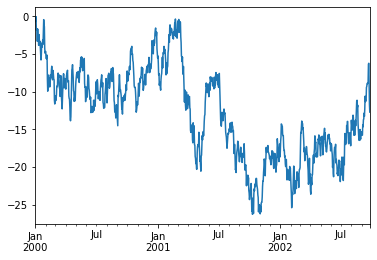

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

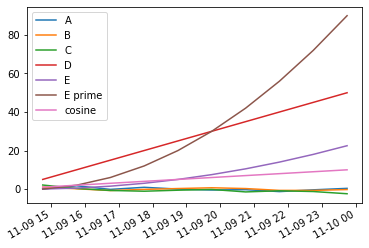

In [68]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')